<a href="https://colab.research.google.com/github/daisuke08253649/DeepLearning/blob/main/Car_mileage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9.0 43.4
4.775062552476207 34.81039703058693
4.775062552476207 43.4
2.966331335522056
4.002102589330999


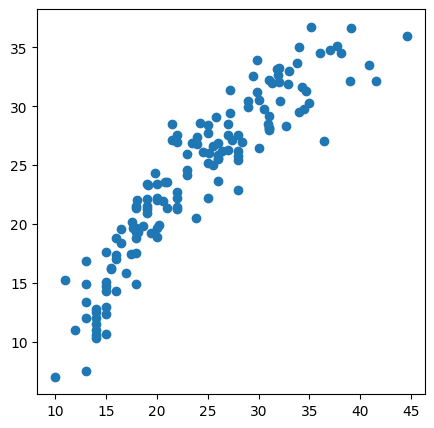

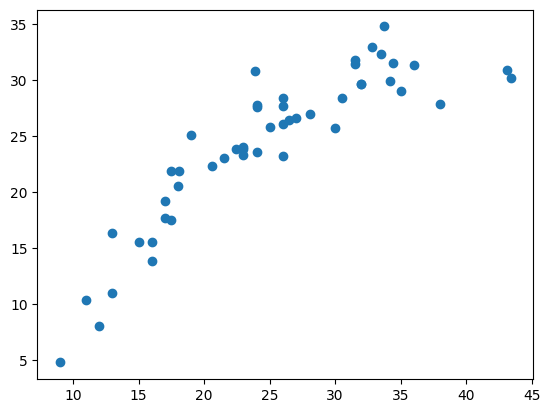

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


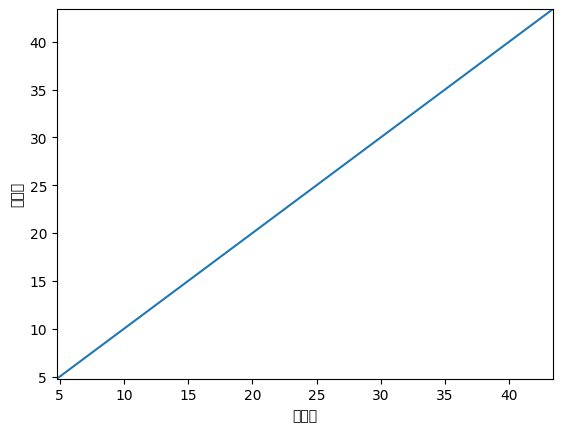

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE


train_df = pd.read_csv('/content/drive/MyDrive/DeepLearning/SIGNATE/Car_mileage_prediction/train.tsv', sep='\t')

train_df = train_df.drop(columns=['id', 'car name'])

train_df['horsepower'] = train_df['horsepower'].replace('?', np.nan)

train_data = train_df.dropna()

X = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
y = train_data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

lr = LR()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

test_min = np.min(y_test)
test_max = np.max(y_test)
print(test_min, test_max)

pred_min = np.min(y_pred_test)
pred_max = np.max(y_pred_test)
print(pred_min, pred_max)

min_value = np.minimum(test_min, pred_min)
max_value = np.maximum(test_max, pred_max)
print(min_value, max_value)

train_mse = MSE(y_train, y_pred_train)
rmse_train = np.sqrt(train_mse)

test_mse = MSE(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print(rmse_train)
print(rmse_test)


plt.figure(figsize=(5,5))
plt.scatter(y_train, y_pred_train)
plt.show()

plt.scatter(y_test, y_pred_test)
plt.show()


plt.xlim([min_value, max_value])
plt.ylim([min_value, max_value])

plt.plot([min_value, max_value], [min_value, max_value])

plt.xlabel('実測値')
plt.ylabel('予測値')

plt.show()